## Βήμα 2o- Συσταδοποίηση (Clustering) 
### α)Επιλέγω τα δεδομένα που θα επεξεργαστώ(Αυτά τα οποία σχετίζονται με την διατροφή)

### β)Υλοποίηση συσταδοποίησης

- **β.1)K-Means**

- **β.2)DBSCAN**
----------------------------------------------------------------------------------------------------------------------

## Βιβλιοθήκες

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns


### Διαβάζουμε τα δεδομένα που φτιάξαμε στο θέμα 1

In [2]:
X_train = pd.read_csv("../CSV_Files/X_train.csv")
X_val = pd.read_csv("../CSV_Files/X_val.csv")
X_test = pd.read_csv("../CSV_Files/X_test.csv")

X = pd.concat([X_train, X_val, X_test], ignore_index=True)

In [3]:
X.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0.080110,0.363016,0.029885,0,1,0.907578,0.577969,1.0,0,0.955593,0,0.865043,0.690102,1.0,0,0,0,1,0
1,0,0.866618,0.314622,0.304041,1,1,0.986213,0.577969,1.0,0,0.318163,0,0.000000,0.000000,1.0,1,0,0,0,0
2,1,0.230769,0.502704,0.266623,1,1,0.500000,0.577969,1.0,0,0.040798,0,0.333333,0.000000,1.0,0,0,0,1,0
3,1,0.257756,0.848591,0.382800,1,1,0.713844,0.879850,1.0,0,0.938048,0,0.605256,0.213232,1.0,0,0,0,1,0
4,0,0.252652,0.474287,0.701468,1,1,1.000000,0.577969,1.0,0,0.366653,0,0.591101,0.460568,1.0,0,0,0,1,0


## 2.α -Επιλογή χαρακτηριστικών για την συσταδοποίηση

In [4]:
dietary_features = [
    'FAVC', 'FCVC',
    'NCP','CALC',
    'CAEC'
]

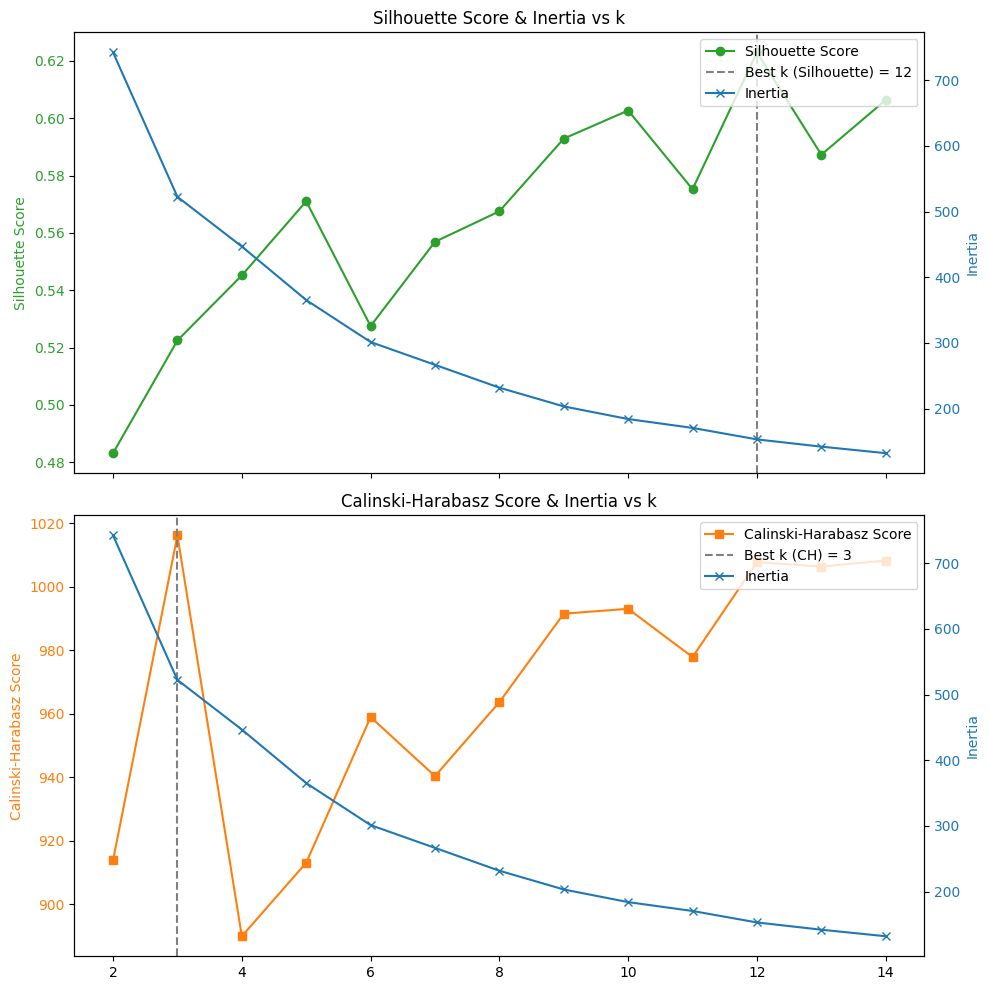

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

data_for_clustering = X[dietary_features]
k_values = range(2, 15)

silhouette_scores = []
ch_scores = []
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_for_clustering)
    
    silhouette_scores.append(silhouette_score(data_for_clustering, labels))
    ch_scores.append(calinski_harabasz_score(data_for_clustering, labels))
    inertias.append(kmeans.inertia_)

best_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
best_k_ch = k_values[ch_scores.index(max(ch_scores))]

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)


ax1 = axs[0]
ax1.plot(k_values, silhouette_scores, marker='o', color='tab:green', label='Silhouette Score')
ax1.axvline(best_k_silhouette, color='gray', linestyle='--', label=f'Best k (Silhouette) = {best_k_silhouette}')
ax1.set_ylabel('Silhouette Score', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')
ax1.set_title('Silhouette Score & Inertia vs k')


ax1_inertia = ax1.twinx()
ax1_inertia.plot(k_values, inertias, marker='x', color='tab:blue', label='Inertia')
ax1_inertia.set_ylabel('Inertia', color='tab:blue')
ax1_inertia.tick_params(axis='y', labelcolor='tab:blue')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_inertia.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

ax2 = axs[1]
ax2.plot(k_values, ch_scores, marker='s', color='tab:orange', label='Calinski-Harabasz Score')
ax2.axvline(best_k_ch, color='gray', linestyle='--', label=f'Best k (CH) = {best_k_ch}')
ax2.set_ylabel('Calinski-Harabasz Score', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_title('Calinski-Harabasz Score & Inertia vs k')


ax2_inertia = ax2.twinx()
ax2_inertia.plot(k_values, inertias, marker='x', color='tab:blue', label='Inertia')
ax2_inertia.set_ylabel('Inertia', color='tab:blue')
ax2_inertia.tick_params(axis='y', labelcolor='tab:blue')

lines3, labels3 = ax2.get_legend_handles_labels()
lines4, labels4 = ax2_inertia.get_legend_handles_labels()
ax2.legend(lines3 + lines4, labels3 + labels4, loc='upper right')

plt.xlabel('Αριθμός Clusters (k)')
plt.tight_layout()
plt.show()

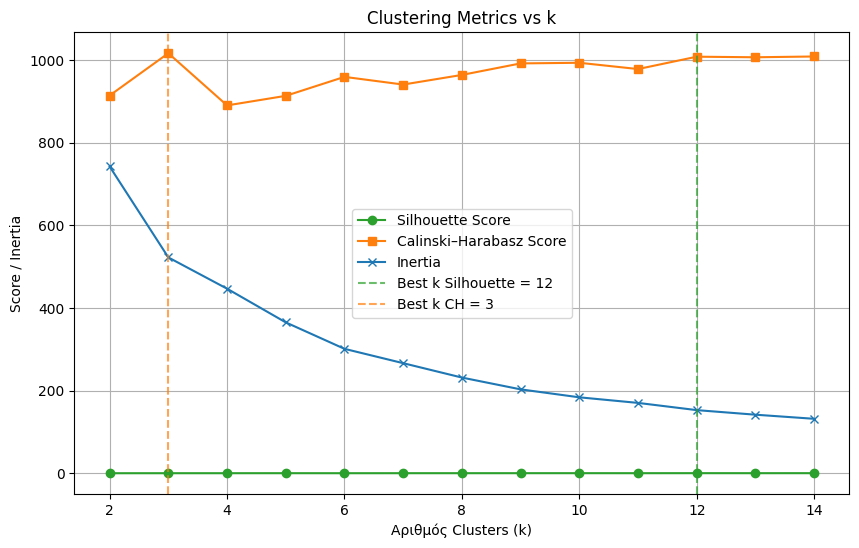

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score', color='tab:green')
plt.plot(k_values, ch_scores, marker='s', label='Calinski–Harabasz Score', color='tab:orange')
plt.plot(k_values, inertias, marker='x', label='Inertia', color='tab:blue')


plt.axvline(best_k_silhouette, color='tab:green', linestyle='--', alpha=0.7, label=f'Best k Silhouette = {best_k_silhouette}')
plt.axvline(best_k_ch, color='tab:orange', linestyle='--', alpha=0.7, label=f'Best k CH = {best_k_ch}')

plt.xlabel('Αριθμός Clusters (k)')
plt.ylabel('Score / Inertia')
plt.title('Clustering Metrics vs k')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_for_clustering)
    
    score = silhouette_score(data_for_clustering, cluster_labels)
    print(f"k={k} ➜ Silhouette Score: {score:.4f}")

k=2 ➜ Silhouette Score: 0.4832
k=3 ➜ Silhouette Score: 0.5225
k=4 ➜ Silhouette Score: 0.5452
k=5 ➜ Silhouette Score: 0.5710
k=6 ➜ Silhouette Score: 0.5275
k=7 ➜ Silhouette Score: 0.5569
k=8 ➜ Silhouette Score: 0.5675
k=9 ➜ Silhouette Score: 0.5929
k=10 ➜ Silhouette Score: 0.6027
k=11 ➜ Silhouette Score: 0.5752
k=12 ➜ Silhouette Score: 0.6230
k=13 ➜ Silhouette Score: 0.5873
k=14 ➜ Silhouette Score: 0.6064
k=15 ➜ Silhouette Score: 0.6416
k=16 ➜ Silhouette Score: 0.6207
k=17 ➜ Silhouette Score: 0.6048
k=18 ➜ Silhouette Score: 0.6087
k=19 ➜ Silhouette Score: 0.5734


In [8]:
import time
X1=data_for_clustering.copy()
start_kmeans = time.time()

best_k =12
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
X1['cluster'] = final_kmeans.fit_predict(data_for_clustering)
end_kmeans = time.time()
execution_time_kmeans = end_kmeans - start_kmeans
print(f"KMeans χρόνος εκτέλεσης: {execution_time_kmeans:.4f} δευτερόλεπτα")

KMeans χρόνος εκτέλεσης: 0.0193 δευτερόλεπτα


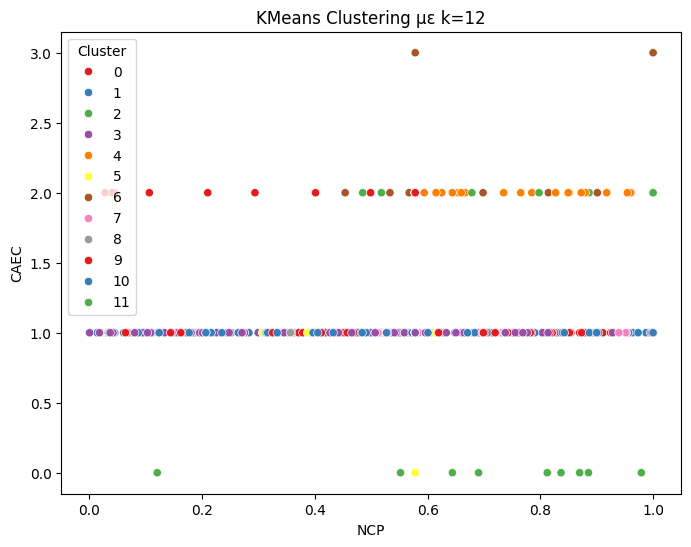

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X1.iloc[:, 2],
    y=X1.iloc[:, 4],
    hue=X1['cluster'],
    palette='Set1'
)
plt.title('KMeans Clustering με k=12')
plt.xlabel(data_for_clustering.columns[2])
plt.ylabel(data_for_clustering.columns[4])
plt.legend(title='Cluster')
plt.show()


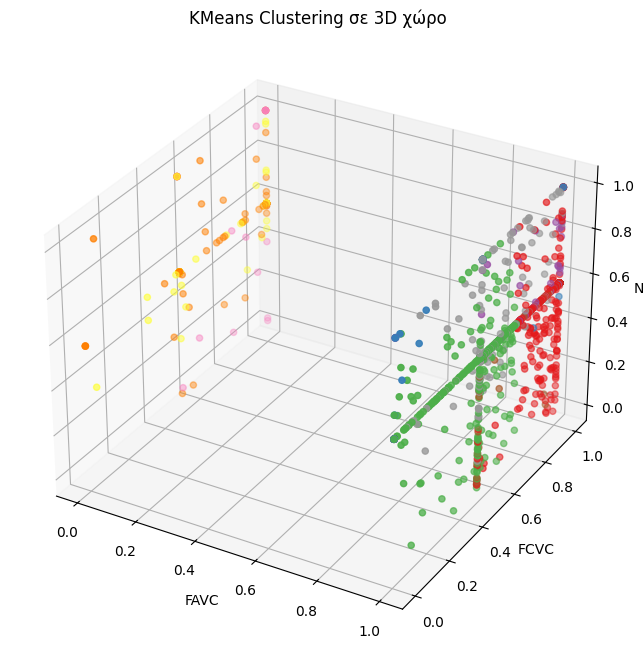

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X1.iloc[:, 0],
    X1.iloc[:, 1],
    X1.iloc[:, 2],
    c=X1['cluster'],
    cmap='Set1'
)
ax.set_title('KMeans Clustering σε 3D χώρο')
ax.set_xlabel(data_for_clustering.columns[0])
ax.set_ylabel(data_for_clustering.columns[1])
ax.set_zlabel(data_for_clustering.columns[2])
plt.show()


## DBSCAN

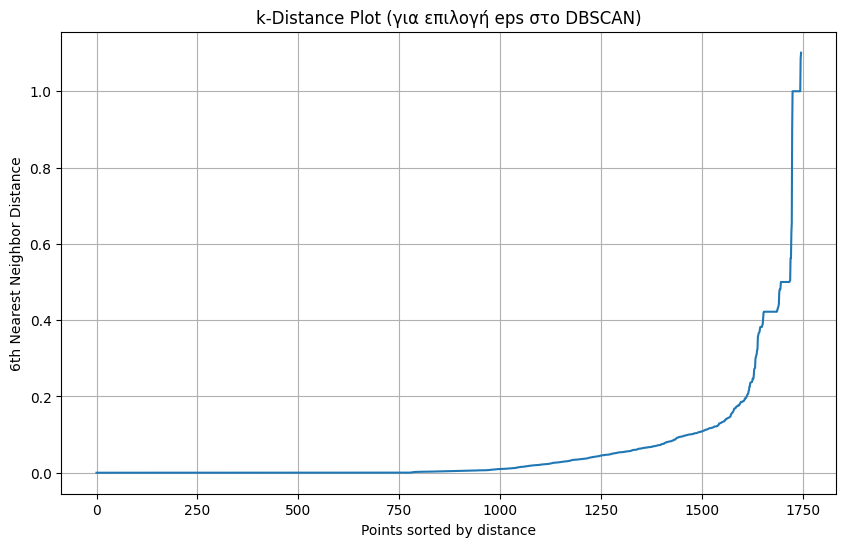

In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Επιλογή του k (συνήθως ίσο με min_samples)
k = 6  # ίσο με min_samples
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(data_for_clustering)
distances, indices = neigh.kneighbors(data_for_clustering)

# Παίρνουμε την απόσταση προς τον k-οστό γείτονα (άξονας: απόσταση)
k_distances = distances[:, -1]  # η τελευταία στήλη είναι η απόσταση προς τον 10ο πιο κοντινό γείτονα

# Ταξινόμηση αποστάσεων σε αύξουσα σειρά
k_distances = np.sort(k_distances)

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.ylabel(f"{k}th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.title("k-Distance Plot (για επιλογή eps στο DBSCAN)")
plt.grid(True)
plt.show()


In [12]:
from sklearn.cluster import DBSCAN
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6]
min_samples_values = [4, 5, 6, 7, 8]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_for_clustering)
        
        if len(set(labels)) > 1:
            sil_score = silhouette_score(data_for_clustering, labels)
        else:
            sil_score = -1 
        
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        
        n_noise = list(labels).count(-1)
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'silhouette_score': sil_score,
            'n_clusters': n_clusters,
            'n_noise': n_noise
        })


import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

    eps  min_samples  silhouette_score  n_clusters  n_noise
0   0.2            4          0.624926          22       76
1   0.2            5          0.611307          18      100
2   0.2            6          0.602686          16      111
3   0.2            7          0.596389          16      118
4   0.2            8          0.583380          13      138
5   0.3            4          0.630866          20       64
6   0.3            5          0.618445          16       81
7   0.3            6          0.610786          14       91
8   0.3            7          0.604710          13       99
9   0.3            8          0.604710          13       99
10  0.4            4          0.632306          18       55
11  0.4            5          0.624576          14       71
12  0.4            6          0.617258          12       81
13  0.4            7          0.617258          12       81
14  0.4            8          0.617258          12       81
15  0.5            4          0.660035  

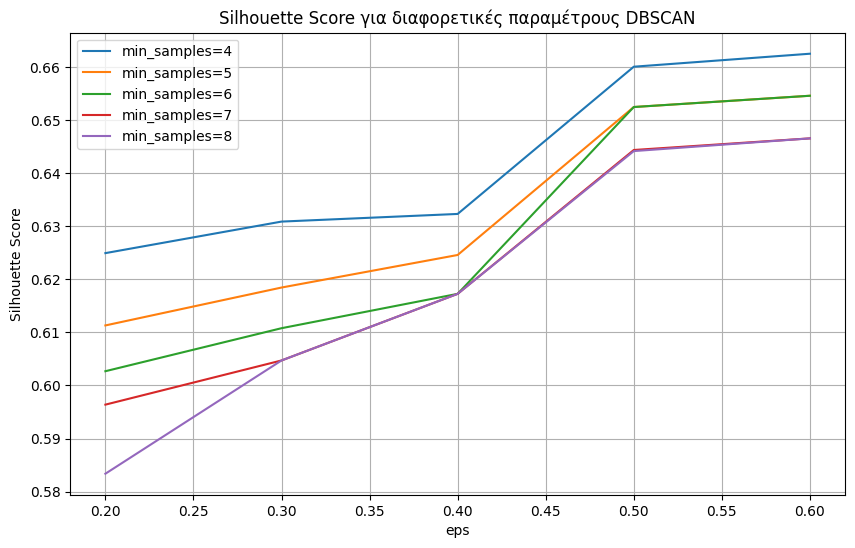

In [13]:
plt.figure(figsize=(10, 6))
for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['silhouette_score'], label=f'min_samples={min_samples}')

plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score για διαφορετικές παραμέτρους DBSCAN')
plt.legend()
plt.grid(True)
plt.show()

dbscan χρόνος εκτέλεσης: 0.0760 δευτερόλεπτα


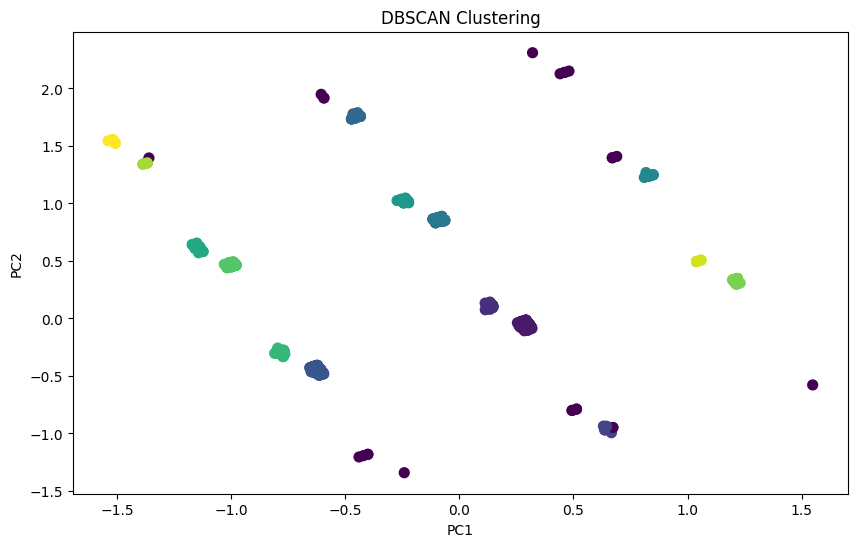

Silhouette Score για DBSCAN: 0.6524431491719349


In [14]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


start_kmeans = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=6)
dbscan_labels = dbscan.fit_predict(data_for_clustering)
end_kmeans = time.time()
execution_time_kmeans = end_kmeans - start_kmeans
print(f"dbscan χρόνος εκτέλεσης: {execution_time_kmeans:.4f} δευτερόλεπτα")


pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_for_clustering)

plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.show()

if len(set(dbscan_labels)) > 1:  
    sil_score_dbscan = silhouette_score(data_for_clustering, dbscan_labels)
    print(f'Silhouette Score για DBSCAN: {sil_score_dbscan}')
else:
    print("DBSCAN δεν βρήκε αρκετά clusters για υπολογισμό Silhouette Score.")


In [15]:
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0) 
dbscan_clusters

15

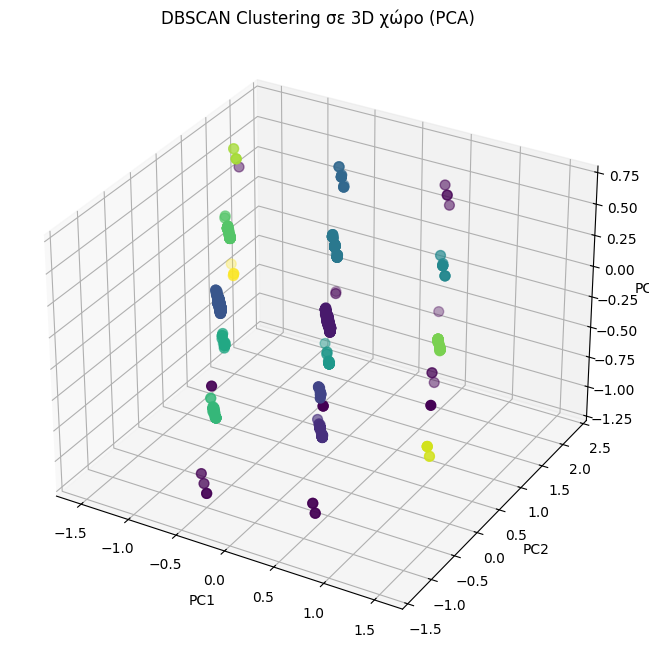

Silhouette Score για DBSCAN: 0.6524431491719349


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D


dbscan = DBSCAN(eps=0.5, min_samples=6)
dbscan_labels = dbscan.fit_predict(data_for_clustering)


pca_3d = PCA(n_components=3)
data_3d = pca_3d.fit_transform(data_for_clustering)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    data_3d[:, 0],
    data_3d[:, 1],
    data_3d[:, 2],
    c=dbscan_labels,
    cmap='viridis',
    s=50
)

ax.set_title('DBSCAN Clustering σε 3D χώρο (PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


if len(set(dbscan_labels)) > 1:
    sil_score_dbscan = silhouette_score(data_for_clustering, dbscan_labels)
    print(f'Silhouette Score για DBSCAN: {sil_score_dbscan}')
else:
    print("DBSCAN δεν βρήκε αρκετά clusters για υπολογισμό Silhouette Score.")
